## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('task_d.csv')

In [5]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [6]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [7]:
data.corr()


,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


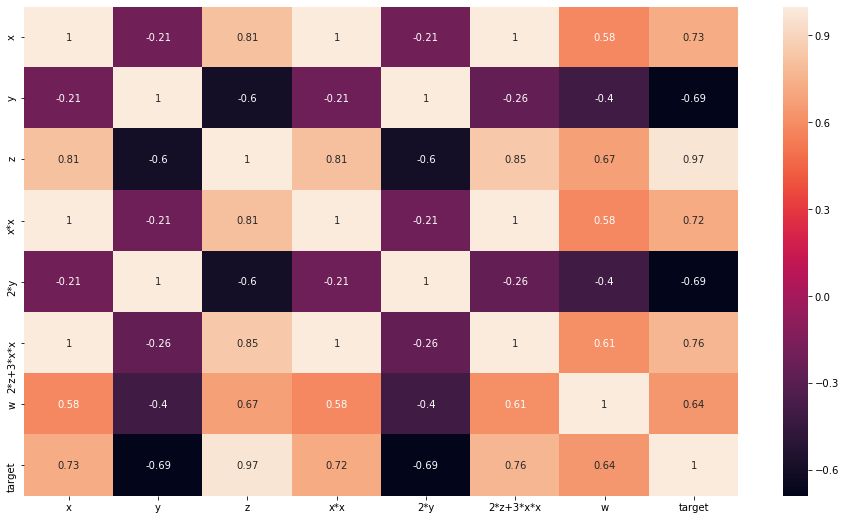

In [9]:
random_state=25
param_grid = {'alpha':[0.0001,0.01,1,100]}
log_reg = SGDClassifier(loss='log',random_state=42)
grid_search = GridSearchCV(log_reg,param_grid)
grid_search.fit(X,Y)
print(grid_search.best_params_)

{'alpha': 0.01}


In [10]:
best_model = SGDClassifier(loss='log', alpha=grid_search.best_params_['alpha'],random_state=42)
best_model

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
best_model.fit(X,Y)
prediction = best_model.predict(X)
accuracy = best_model.score(X,prediction)
weight = best_model.coef_
print("Accuracy:",accuracy)
print("weight:",weight)

Accuracy: 1.0
weight: [[ 0.71810131 -0.91776522  1.70700796  0.65857264 -0.91776522  0.79881225
   0.50168857]]


In [27]:
X_edited = X+1e-2
best_model.fit(X_edited,Y)
prediction = best_model.predict(X_edited)
best_model_accuracy_edited = best_model.score(X_edited,prediction)
w_edited = best_model.coef_
print(best_model_accuracy_edited)
print(w_edited)

1.0
[[ 0.7182315  -0.91798831  1.70612177  0.65888883 -0.91798831  0.79900034
   0.50153083]]


In [32]:
print(best_model_accuracy_edited-accuracy)
print(abs(weight-w_edited))

0.0
[[0.00013019 0.00022309 0.00088619 0.00031619 0.00022309 0.00018809
  0.00015774]]


In [36]:
top4_features = np.argsort(abs(weight-w_edited)[0])[::-1][:4]
print(data.columns[top4_features])

Index(['z', 'x*x', '2*y', 'y'], dtype='object')


# TASK-2

In [37]:
random_state=25
param_grid = {'alpha':[0.0001,0.01,1,100]}
log_reg = SGDClassifier(loss='hinge',random_state=42)
grid_search = GridSearchCV(log_reg,param_grid)
grid_search.fit(X,Y)
print(grid_search.best_params_)

{'alpha': 0.0001}


In [38]:
best_model = SGDClassifier(loss='hinge', alpha=grid_search.best_params_['alpha'],random_state=42)
best_model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
best_model.fit(X,Y)
prediction = best_model.predict(X)
accuracy = best_model.score(X,prediction)
weight = best_model.coef_
print("Accuracy:",accuracy)
print("weight:",weight)

Accuracy: 1.0
weight: [[  7.21730153 -10.49088768  19.80601486   5.97954742 -10.49088768
    7.77287118   7.53662906]]


In [40]:
X_edited = X+1e-2
best_model.fit(X_edited,Y)
prediction = best_model.predict(X_edited)
best_model_accuracy_edited = best_model.score(X_edited,prediction)
w_edited = best_model.coef_
print(best_model_accuracy_edited)
print(w_edited)

1.0
[[  7.27288796 -10.43530125  19.86160129   6.03513386 -10.43530125
    7.82845761   7.5922155 ]]


In [42]:
print(best_model_accuracy_edited-accuracy)
print(abs(weight-w_edited))

0.0
[[0.05558644 0.05558644 0.05558644 0.05558644 0.05558644 0.05558644
  0.05558644]]


In [43]:
top4_features = np.argsort(abs(weight-w_edited)[0])[::-1][:4]
print(data.columns[top4_features])

Index(['x', 'w', '2*z+3*x*x', '2*y'], dtype='object')


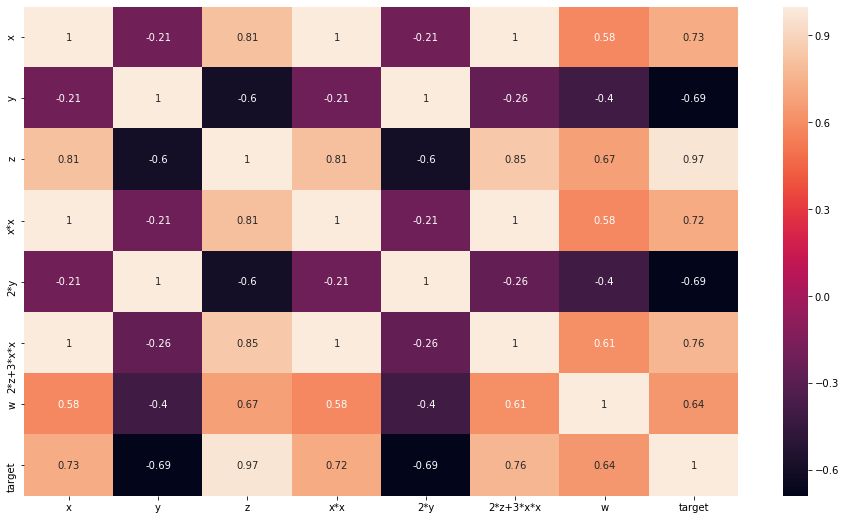

In [45]:
data_edited = pd.DataFrame(np.concatenate((X_edited,Y.reshape(100,1)),axis=1),columns=['x','y','z','x*x','2*y','2*z+3*x*x','w','target'])
#reference from https://indianaiproduction.com/seaborn-heatmap/
plt.figure(figsize=(16,9))
 
sns.heatmap(data_edited.corr(), annot = True)
